# Solve Tree Problems Recursively

https://leetcode.com/explore/learn/card/data-structure-tree/17/solve-problems-recursively/534/

In previous sections, we have introduced how to solve tree traversal problems recursively. Recursion is one of the most powerful and frequently used techniques for solving tree problems.

As we know, a tree can be defined recursively as a node(the root node) that includes a value and a list of references to children nodes. **Recursion is one of the natural features of a tree.** Therefore, many tree problems can be solved recursively. For each recursive function call, we only focus on the problem for the current node and call the function recursively to solve its children.

Typically, we can solve a tree problem recursively using a top-down approach or using a bottom-up approach.

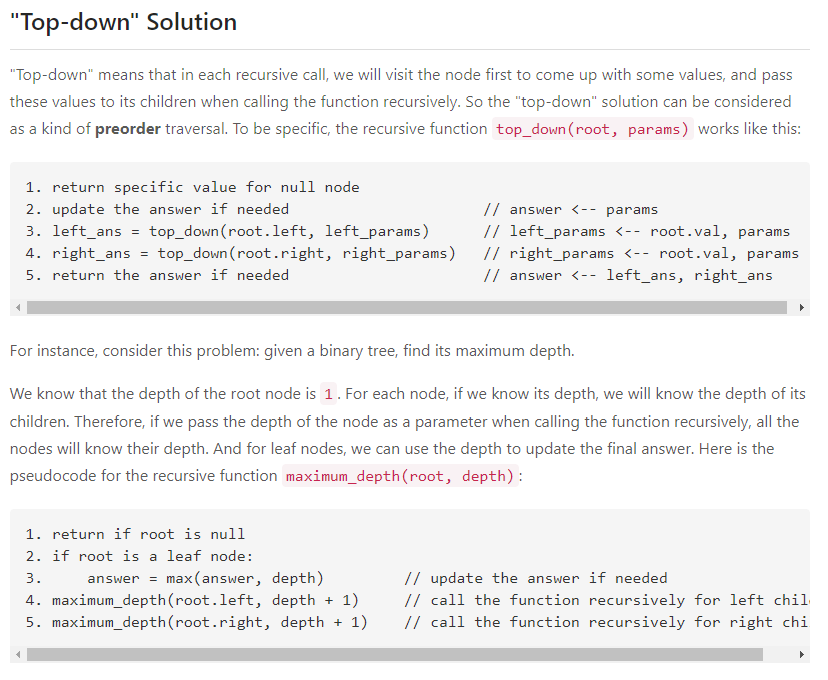

```cpp
int answer; // don't forget to initialize answer before call maximum_depth
void maximum_depth(TreeNode* root, int depth) {
    if (!root) {
        return;
    }
    if (!root->left && !root->right) {
        answer = max(answer, depth);
    }
    maximum_depth(root->left, depth + 1);
    maximum_depth(root->right, depth + 1);
}

```

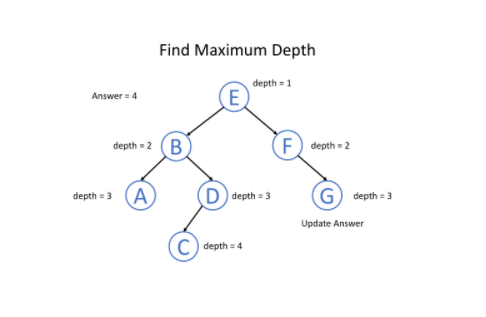

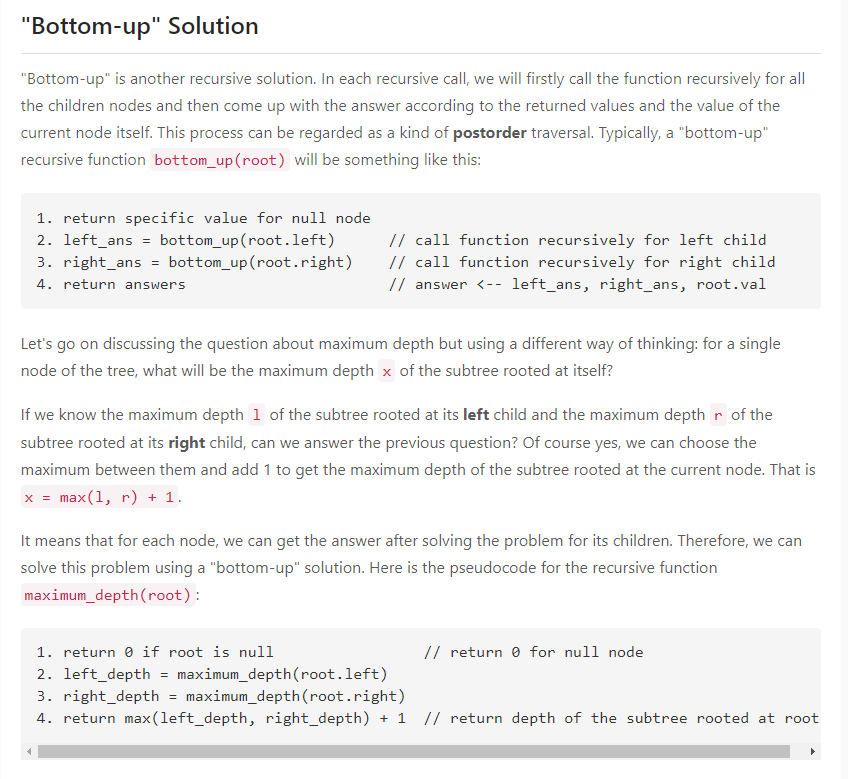

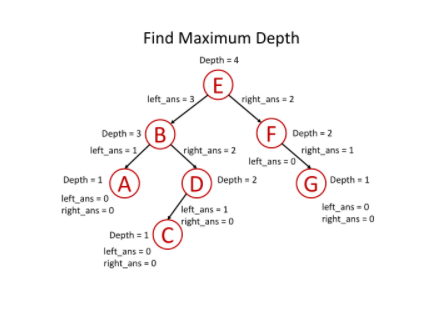

```cpp
int maximum_depth(TreeNode* root) {
    if (!root) {
        return 0;                                 // return 0 for null node
    }
    int left_depth = maximum_depth(root->left);
    int right_depth = maximum_depth(root->right);
    return max(left_depth, right_depth) + 1;      // return depth of the subtree rooted at root
}

```

## Conclusion
----
It is not easy to understand recursion and find out a recursive solution for the problem. It needs practice.
When you meet a tree problem, ask yourself two questions: Can you determine some parameters to help the node know its answer? Can you use these parameters and the value of the node itself to determine what should be the parameters passed to its children? If the answers are both yes, try to solve this problem using a "top-down" recursive solution.

Or, you can think of the problem in this way: for a node in a tree, if you know the answer of its children, can you calculate the answer of that node? If the answer is yes, solving the problem recursively using a bottom up approach might be a good idea.

In the following sections, we provide several classic problems for you to help you understand tree structure and recursion better.

## Maximum Depth of Binary Tree

https://leetcode.com/explore/learn/card/data-structure-tree/17/solve-problems-recursively/535/

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

 

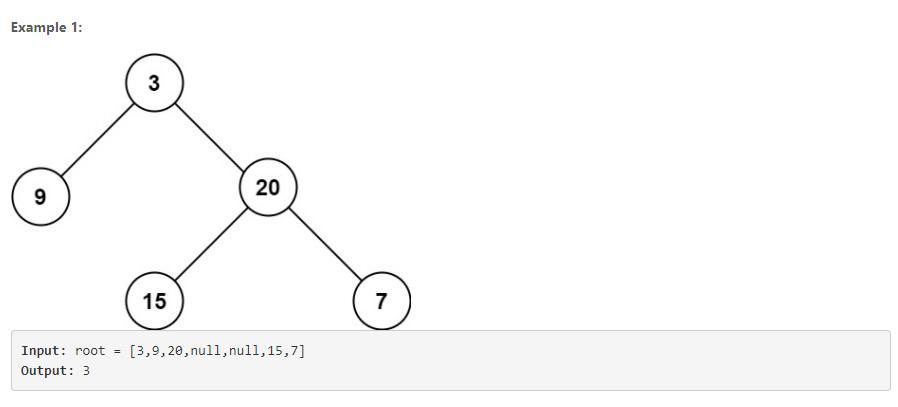

#### Accepted
```cpp
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    int DFS(TreeNode* cur){
        if(!cur){
            return 0;
        }
        
        if(!cur->left and !cur->right){
            return 1;
        }
        
        int max_depth = -1;
        if(cur->left){
            max_depth = DFS(cur->left);
        }
        if(cur->right){
            int tmp = DFS(cur->right);
            if(tmp>=max_depth){
                max_depth = tmp;
            }
        }
        return max_depth +1;
    }
    
    
    
    
    int maxDepth(TreeNode* root) {
        return DFS(root);
        
    }
};

```

### Solutions
https://leetcode.com/problems/maximum-depth-of-binary-tree/solution/

#### Tree definition
```cpp
/* Definition for a binary tree node. */
struct TreeNode {
  int val;
  TreeNode *left;
  TreeNode *right;
  TreeNode(int x) : val(x), left(NULL), right(NULL) {}
};
```

#### Approach 1: Recursion     

##### 直接用null来判断就可以了

```cpp
class Solution {
  public:
    int maxDepth(TreeNode *root) {
      if (root == NULL) {
        return 0;
      }
      return max(1 + maxDepth(root -> left), 1 + maxDepth(root -> right));
    }
};
```

#### Approach 2: Tail Recursion + BFS
```cpp
class Solution {

  private:
    // The queue that contains the next nodes to visit, 
    //   along with the level/depth that each node is located.
    queue<pair<TreeNode*, int>> next_items;
    int max_depth = 0;
    
    /**
     * A tail recursion function to calculate the max depth
     *   of the binary tree.
     */
    int next_maxDepth() {
    
      if (next_items.size() == 0) {
        return max_depth;
      }
        
      auto next_item = next_items.front();
      next_items.pop();

      auto next_node = next_item.first;
      auto next_level = next_item.second + 1;
      
      max_depth = max(max_depth, next_level);

      // Add the nodes to visit in the following recursive calls.
      if (next_node->left != NULL) {
        next_items.push(make_pair(next_node->left, next_level));
      }
      if (next_node->right != NULL) {
        next_items.push(make_pair(next_node->right, next_level));
      }
    
      // The last action should be the ONLY recursive call
      //   in the tail-recursion function.
      return next_maxDepth();
    }
    
  public:
    int maxDepth(TreeNode* root) {
      if (root == NULL) return 0;
        
      // clear the previous queue.
      std::queue<pair<TreeNode*, int>> empty;
      std::swap(next_items, empty);
      max_depth = 0;
        
      // push the root node into the queue to kick off the next visit.
      next_items.push(make_pair(root, 0));
        
      return next_maxDepth();
    }
};
```

#### Approach 3: Iteration
```cpp
class Solution {
  public:
  int maxDepth(TreeNode* root) {
    if (root == NULL) {
      return 0;
    }

    vector<pair<int, TreeNode*>> my_stack;
    my_stack.push_back(pair<int, TreeNode*>(1, root));
    int max_depth = 0;
    while (!my_stack.empty()) {
      pair<int, TreeNode*> my_pair = my_stack.back();
      int c_depth = get<0>(my_pair);
      TreeNode* c_node = get<1>(my_pair);
      max_depth = max(max_depth, c_depth);
      my_stack.pop_back();
      if (c_node->left != NULL) {
        my_stack.push_back(pair<int, TreeNode*>(c_depth + 1, c_node->left));
      }
      if (c_node->right != NULL) {
        my_stack.push_back(pair<int, TreeNode*>(c_depth + 1, c_node->right));
      }
    }
    return max_depth;
  }
};
```